In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, date, time, timedelta

sns.set(style = 'whitegrid')
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [126]:
# load data and attach colums
cols = ['position','surname','name','swim','T1','peak','bike','T2','remove1','bc_to_fin', 'remove2','run','overall']
data = pd.read_csv("thorxtri.csv", names = cols, skiprows= 1)
df = pd.DataFrame(data)

# clean
df = df.drop(['remove1','remove2'], axis = 1)
#df.drop(['position' == 'dnf'], axis = 0)
df['number'], df['surname'] = df['surname'].str.split(' ', 1).str

In [127]:
df = df[df['position'] != 'dnf']

In [128]:
s = []
for time in df['overall']:
    elements = time.split(':')
    seconds = (int(elements[0])*60*60) + (int(elements[1])*60) + int(elements[2])
    s.append(seconds)
df['s_overall'] = s

s = []
for time in df['swim']:
    elements = time.split(':')
    seconds = (int(elements[0])*60*60) + (int(elements[1])*60) + int(elements[2])
    s.append(seconds)
df['s_swim'] = s

s = []
for time in df['run']:
    elements = time.split(':')
    seconds = (int(elements[0])*60*60) + (int(elements[1])*60) + int(elements[2])
    s.append(seconds)
df['s_run'] = s

s = []
for time in df['bike']:
    elements = time.split(':')
    seconds = (int(elements[0])*60*60) + (int(elements[1])*60) + int(elements[2])
    s.append(seconds)
df['s_bike'] = s

s = []
for time in df['peak']:
    elements = time.split(':')
    seconds = (int(elements[0])*60*60) + (int(elements[1])*60) + int(elements[2])
    s.append(seconds)
df['s_bike_peak'] = s

s = []
for time in df['T1']:
    elements = time.split(':')
    seconds = (int(elements[0])*60*60) + (int(elements[1])*60) + int(elements[2])
    s.append(seconds)
df['s_t1'] = s

s = []
for time in df['T2']:
    elements = time.split(':')
    seconds = (int(elements[0])*60*60) + (int(elements[1])*60) + int(elements[2])
    s.append(seconds)
df['s_t2'] = s

In [129]:
df.head()
print('Total number of participants: {}'.format(df.surname.nunique()))

Total number of participants: 48


# Overall

In [130]:
import matplotlib.style as style
style.available
style.use('fivethirtyeight')

In [131]:
print('Fastest partipant took {} minutes'.format(round(df.s_overall.min() / 60), 3))

Fastest partipant took 700.0 minutes


Text(0,0.5,'Number of participants')

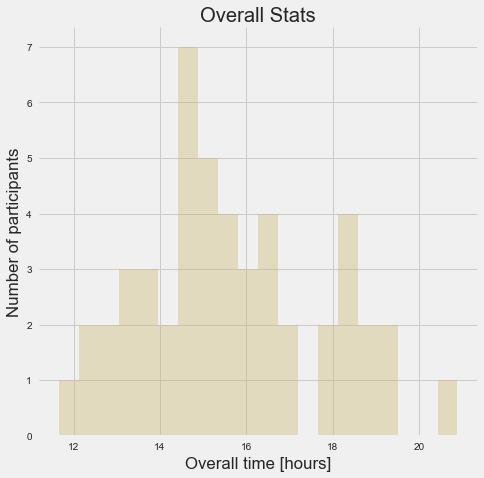

In [132]:
f, axes = plt.subplots(figsize=(7, 7))
sns.despine(left=True)

sns.distplot((df['s_overall'] / 3600), kde = False, color="y", bins = 20)
plt.title('Overall Stats')
plt.xlabel('Overall time [hours]')
plt.ylabel('Number of participants')

# Swimming

In [133]:
swim_distance = 3.800 # kms

df['swim_speed'] = round(swim_distance / (df['s_swim'] / 3600), 2) # km / hr
df['swim_pace'] = round((df['swim_speed'].pow(-1) * 60) / 10, 2) # min / 100m

In [138]:
print('Fastest swimmer took {} minutes'.format(round(df.s_swim.min() / 60), 3))
print('This was a pace of {} min per 100 meters'.format(df.swim_pace.min()))
print()
print('Average swimmer took {} minutes'.format(round(df.s_swim.mean() / 60), 3))
print('This was a pace of {} min per 100 meters'.format(round(df.swim_pace.mean(),2)))#

Fastest swimmer took 77.0 minutes
This was a pace of 2.03 min per 100 meters

Average swimmer took 110 minutes
This was a pace of 2.89 min per 100 meters


Text(0,0.5,'Number of participants')

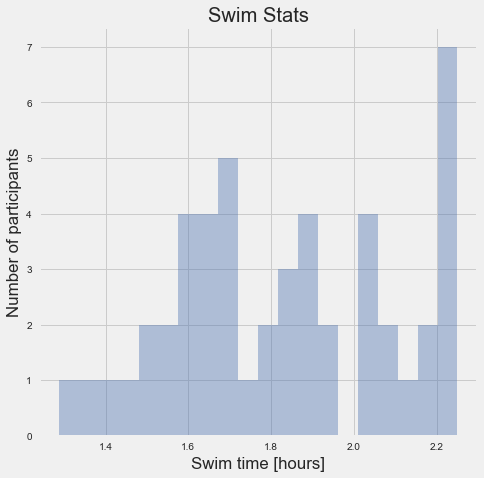

In [140]:
f, axes = plt.subplots(figsize=(7, 7))
sns.distplot((df['s_swim'] / 3600), kde = False, bins = 20, color = 'b')
plt.title('Swim Stats')
plt.xlabel('Swim time [hours]')
plt.ylabel('Number of participants')

# Biking

In [168]:
bike_distance_peak = 15.7
bike_distance = 180.7# kilometers

df['bike_speed'] = round(bike_distance / (df['s_bike'] / 3600), 2) # km / hour
df['bike_speed_peak'] = round(bike_distance_peak / (df['s_bike_peak'] / 3600), 2)

In [169]:
print('The climb is 932 meters, fasted speed is: {} kilomters per hour'.format(df.bike_speed_peak.max()))
print('Maximum average speed: {} kilometers per hour'.format(df.bike_speed.max())) 
print('Total time on the bike: {} hours'.format(round(df.s_bike.min() / 3600)))
print()
print('The climb is 932 meters, average speed is: {} kilomters per hour'.format(round(df.bike_speed_peak.mean(),2)))
print('Mean average speed: {} kilometers per hour'.format(round(df.bike_speed.mean(),1))) 
print('Mean time on the bike: {} hours'.format(round(df.s_bike.mean() / 3600, 2)))

The climb is 932 meters, fasted speed is: 13.87 kilomters per hour
Maximum average speed: 28.5 kilometers per hour
Total time on the bike: 6.0 hours

The climb is 932 meters, average speed is: 10.56 kilomters per hour
Mean average speed: 22.3 kilometers per hour
Mean time on the bike: 8.25 hours


Text(0,0.5,'Number of participants')

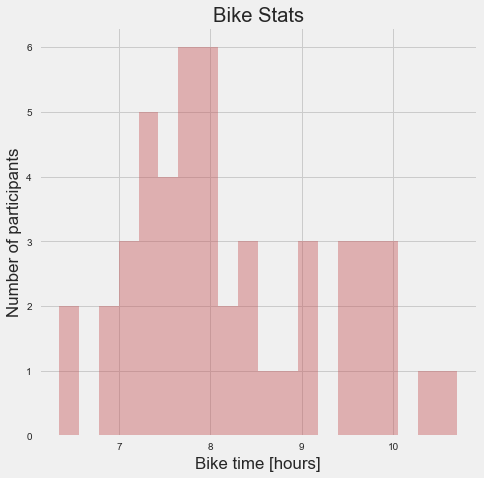

In [170]:
f, axes = plt.subplots(figsize=(7, 7))
sns.distplot((df['s_bike'] / 3600), kde = False, color="r", bins = 20)
plt.title('Bike Stats')
plt.xlabel('Bike time [hours]')
plt.ylabel('Number of participants')

# Running

In [171]:
run_distance = 42.195 # kilometers
df['run_speed'] = round(run_distance / (df['s_run'] / 3600), 2) 
df['run_pace'] = round((df['run_speed'] / 60).pow(-1), 2)

In [176]:
print('The fastest runner ran {} kilomters per hour'.format(df.run_speed.max()))
print('That is a pace of {} min / km'.format(df.run_pace.min()))
print()
print('The average runner ran {} kilomters per hour'.format(round(df.run_speed.mean(),2)))
print('That is a pace of {} min / km'.format(round(df.run_pace.mean(),2)))


The fastest runner ran 12.13 kilomters per hour
That is a pace of 4.95 min / km

The average runner ran 8.45 kilomters per hour
That is a pace of 7.31 min / km


Text(0,0.5,'Number of participants')

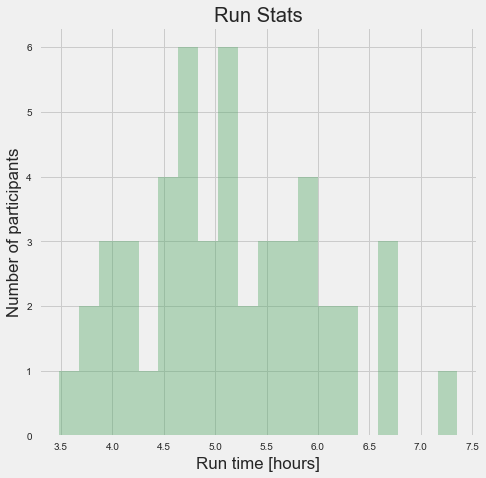

In [103]:
f, axes = plt.subplots(figsize=(7, 7))
sns.distplot((df['s_run'] / 3600), kde = False, color="g", bins = 20)
plt.title('Run Stats')
plt.xlabel('Run time [hours]')
plt.ylabel('Number of participants')

# Overall Results

In [177]:
# the fastest person

print('The fastest persion swam (pace min/100m): {}'.format(df[df['position'] == '1st']['swim_pace'].item()))
print('The fastest persion biked (speed km/hr) : {}'.format(df[df['position'] == '1st']['bike_speed'].item()))
print('The fastest persion ran (speed km/hr)   : {}'.format(df[df['position'] == '1st']['run_speed'].item()))

The fastest persion swam (pace min/100m): 2.32
The fastest persion biked (speed km/hr) : 28.5
The fastest persion ran (speed km/hr)   : 11.32


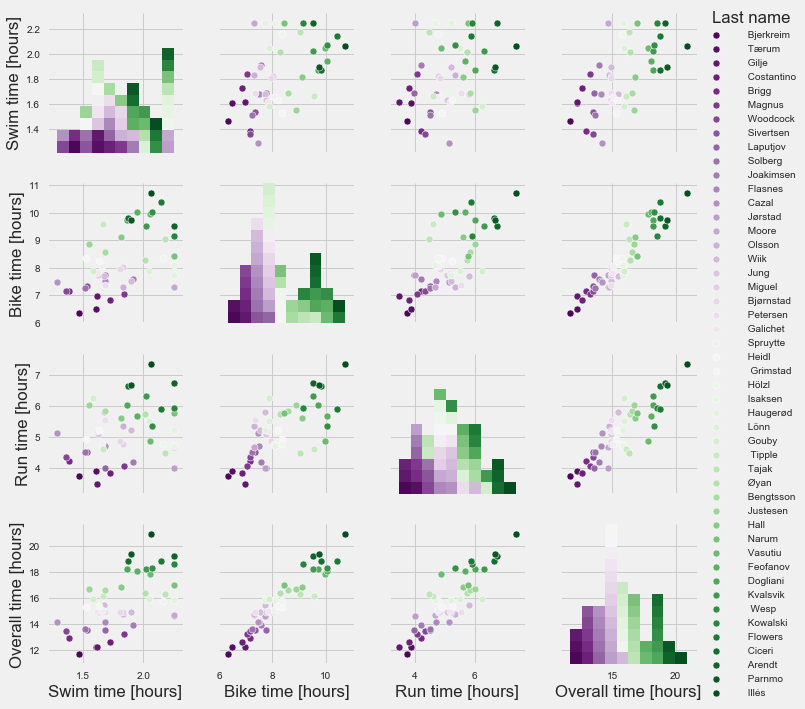

In [108]:
df.columns
sdf = pd.DataFrame()
sdf['Swim time [hours]'] = df['s_swim'] / 3600
sdf['Bike time [hours]'] = df['s_bike'] / 3600
sdf['Run time [hours]']  = df['s_run']  / 3600
sdf['Overall time [hours]'] = df['s_overall'] / 3600
sdf['Last name'] = df['surname']

sns.pairplot(sdf, hue = 'Last name', palette = 'PRGn')